# Bioinformatics Modeling 

## Post-training Analysis - tutorial 4

Basic example of post-training analysis

Excludes manifest processing and catalog interaction 

## Pre-requisites:

Access to an IBM Cloud Object Storage instance

The e2eai_credentials.json file (included in the repo clone) in your local directory updated with credentials for the cloud object storage instance

A copy of ICOS.py (included in the repo clone) in the local directory

The ibm-cos-sdk python package installed in your python execution environment. space


### Contact: fjgreco@us.ibm.com

#### <font color=red>Optional installation of ibm-cos-sdk</font>

In [1]:
# Convert to code from RawNBConvert and run once if needed
!pip install ibm-cos-sdk

### Run the following if in CP4D

### Import packages

In [2]:
import sys
sys.path.append('.')

import json
from ICOS import ICOS as ICOS

### Obtain access credentials

In [3]:
with open("e2eai_credentials.json") as json_file:
    credentials = json.load(json_file)

icos_credentials=credentials['icos_credentials_e2eai']


### Read manifest file

<font color=red>Manifest file handling turned off for tutorial simolification</font>

###  <font color=blue> Set the following two variables:</font>

In [4]:
model_location='training-ixApffeMR'   # Obtained from the training run

results_bucket='e2eai-results-060621'  #Obtained from training run

## Access ICOS

## Retrieve training artifacts from ICOS
### model.h5, model.tgz, model.json, and model_weights.h5 were placed in ICOS by the keras python program

In [5]:
icos=ICOS(icos_credentials=icos_credentials)

In [6]:
icos.list_objects(results_bucket)

Retrieving bucket contents from: e2eai-results-060621

7a076f73-424f-4fb0-aad4-32e2ad023d73/assets/7a076f73-424f-4fb0-aad4-32e2ad023d73/resources/wml_model/request.json
7a076f73-424f-4fb0-aad4-32e2ad023d73/assets/7a076f73-424f-4fb0-aad4-32e2ad023d73/resources/wml_model/training-j5ADjf6Gg.zip
7a076f73-424f-4fb0-aad4-32e2ad023d73/training-status.json
_wml_checkpoints/
b087df29-a85d-4076-ba32-dd9d45bc584a/assets/b087df29-a85d-4076-ba32-dd9d45bc584a/resources/wml_model/request.json
b087df29-a85d-4076-ba32-dd9d45bc584a/assets/b087df29-a85d-4076-ba32-dd9d45bc584a/resources/wml_model/training-ixApffeMR.zip
b087df29-a85d-4076-ba32-dd9d45bc584a/training-status.json
de13e24d-5930-4b60-8776-48daa68a2311/training-status.json
training-ixApffeMR/_submitted_code/model.zip
training-ixApffeMR/bioinformatics_model.h5
training-ixApffeMR/bioinformatics_model.json
training-ixApffeMR/bioinformatics_model.tgz
training-ixApffeMR/bioinformatics_model_cm.p
training-ixApffeMR/bioinformatics_model_history.p
train

In [7]:
local_results_dir='RESULT_DIR'
print('Saving results to {}...'.format(local_results_dir))
dl2=icos.get_download_list_loc(results_bucket, model_location,results_folder=local_results_dir)

Saving results to RESULT_DIR...
Retrieving relevant bucket contents from: e2eai-results-060621 Model_location: training-ixApffeMR

training-ixApffeMR/bioinformatics_model.h5
training-ixApffeMR/bioinformatics_model.json
training-ixApffeMR/bioinformatics_model.tgz
training-ixApffeMR/bioinformatics_model_cm.p
training-ixApffeMR/bioinformatics_model_history.p
training-ixApffeMR/bioinformatics_model_weights.h5
training-ixApffeMR/training-log.txt


## Review results produced during training

### Extract and view accuracy and loss graphs

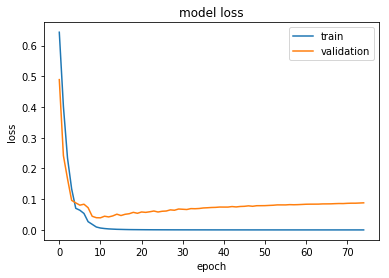

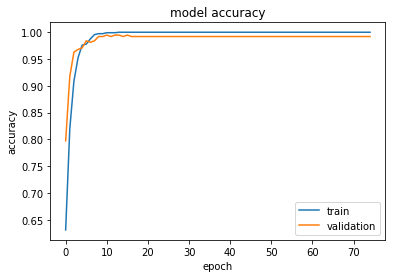

In [8]:
import pickle
with open(local_results_dir+'/bioinformatics_model_history.p', 'rb') as p_file:
    history = pickle.load(p_file)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

plt.savefig(local_results_dir+'/bioinformatics_model_loss.png')
plt.savefig(local_results_dir+'/bioinformatics_model_loss.pdf')
plt.show()


plt.figure()
plt.plot(history['binary_accuracy'])
plt.plot(history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.savefig(local_results_dir+'/bioinformatics_model_accuracy.png')
plt.savefig(local_results_dir+'/bioinformatics_model_accuracy.pdf')
plt.show()

### Extract and view a confusion matrix

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


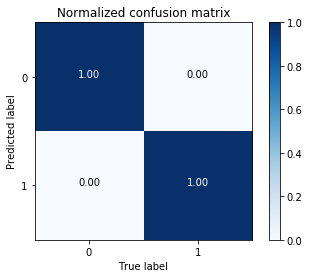

In [9]:
import itertools

with open(local_results_dir+'/bioinformatics_model_cm.p', 'rb') as p_file:
    cm = pickle.load(p_file)

plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Normalized confusion matrix')
plt.colorbar()
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.xticks([0, 1]); plt.yticks([0, 1])
plt.grid('off')
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment='center',
             color='white' if cm[i, j] > 0.5 else 'black')

plt.savefig(local_results_dir+'/bioinformatics_model_confusion_matrix.png')

plt.show()

### Produce accuracy and loss graphs

## Compile model locally

In [10]:
from tensorflow.keras.models import model_from_json,load_model

### Approach 1 - Compile model locally using full .h5 file

In [11]:
loaded_model = load_model(local_results_dir+"/bioinformatics_model.h5", compile=False)
#sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Approach 2: Compile model locally using weights and json

## Generate/Access test data

### Score loaded model

#### <font color=red>For demonstration purposes here, we use the same dataset that was used for training.</font>

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np


sequences_file='DATA_DIR/assay_data_full.seq'
labels_file='DATA_DIR/assay_data_full.lbl'

with open(sequences_file,'r') as file: 
    raw_sequences=file.read()

sequences=raw_sequences.split('\n')

sequences = list(filter(None, sequences))  # This removes empty sequences.


# The LabelEncoder encodes a sequence of bases as a sequence of integers.
integer_encoder = LabelEncoder()  
# The OneHotEncoder converts an array of integers to a sparse matrix where 
# each row corresponds to one possible value of each feature.
one_hot_encoder = OneHotEncoder(categories='auto')   
input_features = []

for sequence in sequences:
    integer_encoded = integer_encoder.fit_transform(list(sequence))
    integer_encoded = np.array(integer_encoded).reshape(-1, 1)
    one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
    input_features.append(one_hot_encoded.toarray())

np.set_printoptions(threshold=40)
input_features = np.stack(input_features)
print("Example sequence\n-----------------------")
print('DNA Sequence #1:\n',sequences[0][:10],'...',sequences[0][-10:])
print('One hot encoding of Sequence #1:\n',input_features[0].T)


with open(labels_file,'r') as file: 
        raw_labels=file.read()

labels=raw_labels.split('\n')

labels = list(filter(None, labels))  # This removes empty sequences.

one_hot_encoder_labels = OneHotEncoder(categories='auto')
labels = np.array(labels).reshape(-1, 1)
input_labels = one_hot_encoder_labels.fit_transform(labels).toarray()

print('Labels:\n',labels.T)
print('One-hot encoded labels:\n',input_labels.T)

#Split into train & test files
#train_features, test_features, train_labels, test_labels = train_test_split(
#    input_features, input_labels, test_size=0.25, random_state=42)

X=input_features
Y=input_labels

Example sequence
-----------------------
DNA Sequence #1:
 CGAGCCAATC ... TTGCGAGGAA
One hot encoding of Sequence #1:
 [[0. 0. 1. ... 0. 1. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Labels:
 [['0' '0' '0' ... '0' '0' '1']]
One-hot encoded labels:
 [[1. 1. 1. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [14]:
score = loaded_model.evaluate(X, Y, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

200/200 [==============================] - 0s 593us/sample - loss: 8.1576e-04 - acc: 1.0000
acc: 100.00%


### Produce a confusion matrix

Confusion matrix:
 [[ 89   0]
 [  0 111]]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


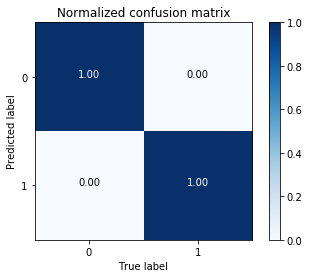

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

predicted_labels = loaded_model.predict(np.stack(input_features))
cm = confusion_matrix(np.argmax(input_labels, axis=1), 
                      np.argmax(predicted_labels, axis=1))
print('Confusion matrix:\n',cm)

cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Normalized confusion matrix')
plt.colorbar()
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.xticks([0, 1]); plt.yticks([0, 1])
plt.grid('off')
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment='center',
             color='white' if cm[i, j] > 0.5 else 'black')

### Make predictions

In [16]:
#print(one_hot_encoder.get_feature_names())
feature_class_list=list(integer_encoder.classes_)

def decode_base(encoded_base,fcl=feature_class_list):
    return fcl[encoded_base.index(1)]       

def make_predictions(model,X,Y):
    y_predictions = model.predict_classes(X)
    y_probabilities = model.predict_proba(X)
    # show the inputs and predicted outputs
    for i in range(len(X)):
        decoded_bases=[]
        for  encoded_base in X[i].tolist():
            decoded_bases.append(decode_base(encoded_base))
        decoded_bases=''.join(decoded_bases)
        print("X={}, Predicted={} Probability={} Y={}".format(decoded_bases, y_predictions[i],y_probabilities[i],Y[i][1]))
    return y_predictions,y_probabilities

#### <font color=red>For demonstration purposes here, we make prediction using the input features from the training data and compare the results to the known labels.</font>

In [17]:
y_predictions,y_probabilities=make_predictions(loaded_model,input_features,input_labels)

X=CGAGCCAATCATTCCGGATAGGTCGGAATTGGGCCCGTTTTTGCGAGGAA, Predicted=0 Probability=[9.9999988e-01 1.6967657e-07] Y=0.0
X=CCGAAAGGGGCTCTAAGCAGATAATTCGGCGGGTGGATCGTTACATTTTG, Predicted=0 Probability=[9.9999988e-01 1.7228417e-07] Y=0.0
X=GCATGTCGGCTCCGGTTTGGATCTACCTCTCACATACTGCGGGTGCTGTT, Predicted=0 Probability=[9.9999833e-01 1.6639312e-06] Y=0.0
X=CAACAATATGTCTCACGACCGAACTCCACAAAGAAGGCTGCGTGCGGCGT, Predicted=1 Probability=[1.1134237e-06 9.9999893e-01] Y=1.0
X=CCTGACTATTACCGGCGGCCTAGGAAAGGTAGGGTTAGTCTCACCTCTCC, Predicted=0 Probability=[9.999995e-01 5.277809e-07] Y=0.0
X=GCTCCGCCCGACCGAACTCCTGACATGCGTTAAATAATCTACGGATCTAA, Predicted=1 Probability=[2.5488620e-07 9.9999976e-01] Y=1.0
X=CCAGGTATGTTAGAACTGACGGGGTAGAAAGCTGAAGCTCAGCCTCCGAC, Predicted=0 Probability=[9.999913e-01 8.676006e-06] Y=0.0
X=TTTGTCATAGAGCCTATGCAGACCACCTGACAGGCAATACCTGTAGCACA, Predicted=0 Probability=[9.9999976e-01 1.8766441e-07] Y=0.0
X=CGTGCTCTATAGGACGACCGAACTCCACAAAATCGGCGAAATATGTCCAT, Predicted=1 Probability=[2.8152456e-07

### <font color=red>Part 2 - Code to generate salience graphs and consensus will be provided at later date</font>